1. https://www.kaggle.com/datasets/arpitsinghaiml/world-population - выбранный датасет для выполнения лабораторной работы.

2. Этот набор данных предоставляет всесторонний обзор мировых тенденций в области народонаселения, исторических данных и будущих прогнозов. Он включает подробную информацию по различным странам и регионам, охватывающую ключевые демографические показатели, такие как численность населения, темпы роста и плотность.

Набор данных охватывает широкий временной промежуток с 1980 по 2050 год, что позволяет анализировать долгосрочную динамику населения. Он включает данные из авторитетных источников, таких как Отдел народонаселения ООН и World Population Review, что обеспечивает точность и надежность данных.
place	Географическое название объекта, например страна, штат, провинция или город.
pop1980	Предполагаемая численность населения этого места в 1980 году.
pop2000	Предполагаемая численность населения этого места в 2000 году.
...
...
...
pop2050	Прогнозируемая численность населения этого места в 2050 году.
country	Страна, которой принадлежит это место.
area	Общая площадь места, включая землю и воду, в квадратных километрах.
landAreaKm	Площадь суши населенного пункта без учета воды, в квадратных километрах.
cca2	Двухбуквенный код страны, определенный стандартом ISO 3166-1.
cca3	Трехбуквенный код страны, определенный стандартом ISO 3166-1.
unMember	Логический флаг, указывающий, является ли страна членом Организации Объединенных Наций.
netChange	Чистое изменение численности населения в период с 1980 по 2023 год.
growthRate	Ежегодный темп прироста населения в период с 1980 по 2023 год.
worldPercentage	Процент от общей численности населения мира, проживающего в данном месте.
density	Плотность места, измеряемая в людях на квадратный километр.
densityMi	Плотность населения места, измеряемая в людях на квадратную милю.
rank	Рейтинг места по численности населения, где 1 означает самое густонаселенное место.

In [14]:
import pandas as pand 
import matplotlib.pyplot as pyplot 
import seaborn as seab 

dframe = pand.read_csv('countries-table.csv') # прочитаем датасет

print(dframe.head())

   place    pop1980     pop2000     pop2010     pop2023     pop2024  \
0    356  687354000  1057920000  1243480000  1438070000  1450940000   
1    156  983164000  1269580000  1351560000  1422580000  1419320000   
2    840  229859000   281484000   311063000   343477000   345427000   
3    360  148951000   216078000   246305000   281190000   283488000   
4    586   82291000   154879000   199239000   247504000   251269000   

      pop2030     pop2050        country       area  landAreaKm cca2 cca3  \
0  1525140000  1679590000          India  3287590.0   2973190.0   IN  IND   
1  1398150000  1260290000          China  9706961.0   9424702.9   CN  CHN   
2   355650000   380847000  United States  9372610.0   9147420.0   US  USA   
3   295877000   320713000      Indonesia  1904569.0   1877519.0   ID  IDN   
4   276883000   371864000       Pakistan   881912.0    770880.0   PK  PAK   

   unMember  netChange  growthRate  worldPercentage   density  densityMi  rank  
0      True     0.4119      0

Уберем из полученного все стобцы, в которых содержатся не числовые значения. Применим конкатенацию и соединим все средние значения и СКО для всех оставшихся столбцов.

In [15]:
input_data = dframe.drop(dframe.columns[[8, 11, 12]], axis=1) 

print(pand.concat([input_data.mean(), input_data.std()], axis=1, keys=['average', 'deviate']))

                      average       deviate
place            4.390855e+02  2.532955e+02
pop1980          1.899993e+07  8.159549e+07
pop2000          2.636699e+07  1.119369e+08
pop2010          2.999963e+07  1.245868e+08
pop2023          3.457263e+07  1.377936e+08
pop2024          3.487289e+07  1.383476e+08
pop2030          3.661291e+07  1.415883e+08
pop2050          4.129358e+07  1.466625e+08
area             5.814500e+05  1.761841e+06
landAreaKm       5.571123e+05  1.689972e+06
unMember         8.333333e-01  3.734769e-01
netChange        9.689520e-03  3.435009e-02
growthRate       9.385897e-03  1.358050e-02
worldPercentage  4.470175e-03  1.749810e-02
density          4.618132e+02  2.051987e+03
densityMi        1.196096e+03  5.314647e+03
rank             1.175000e+02  6.769417e+01


Далее покажем гистограммы для данных из каждой колонки

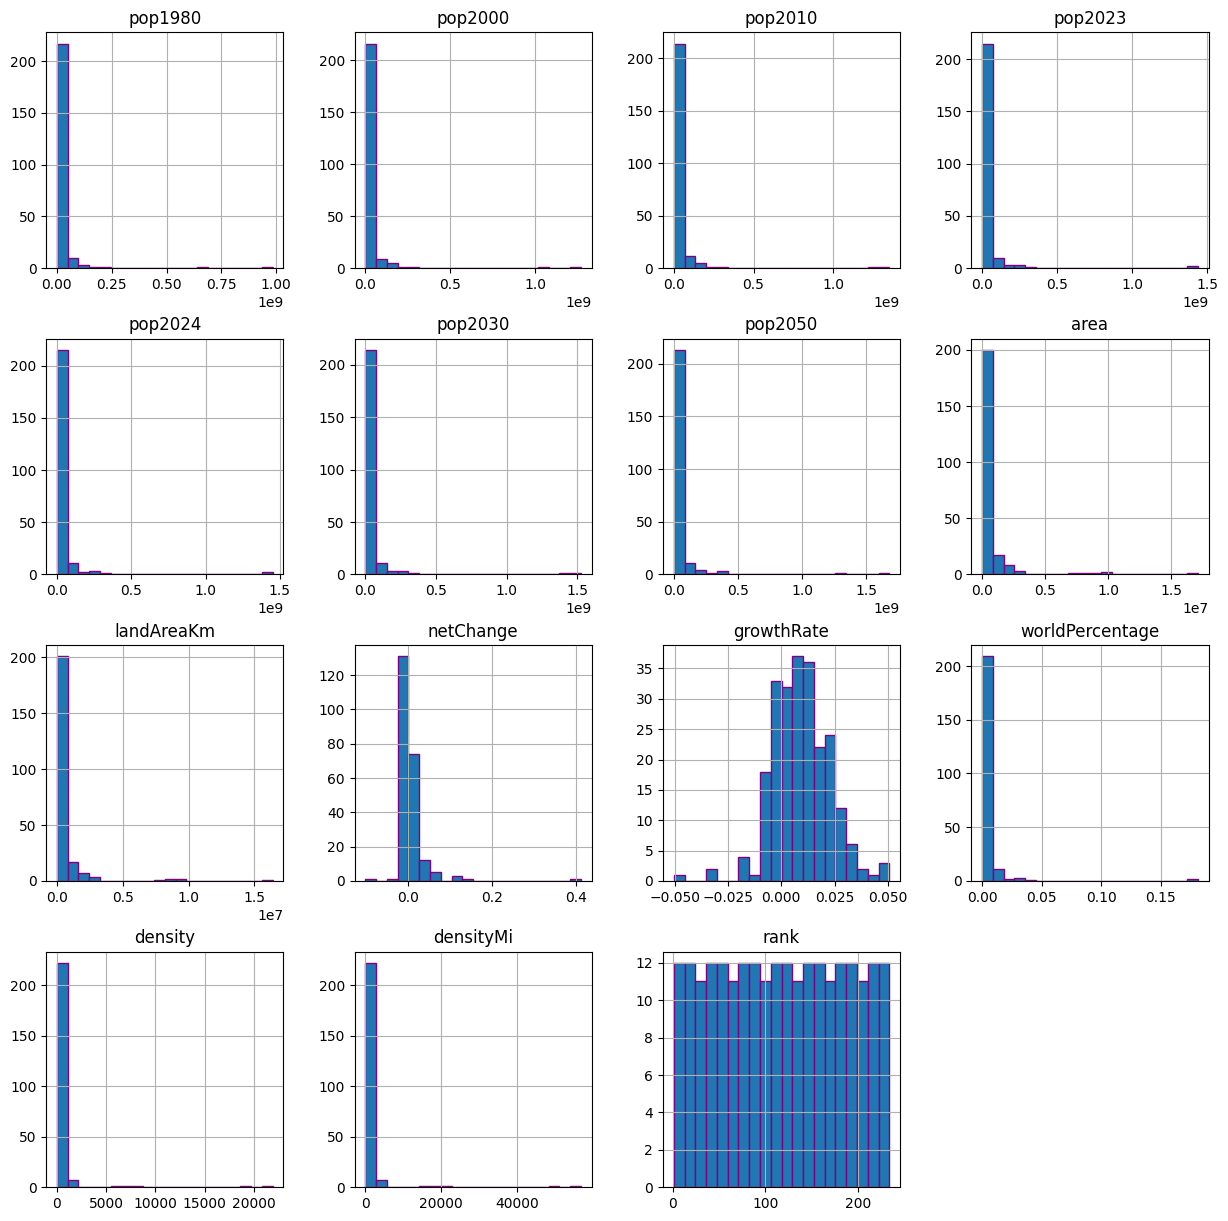

In [16]:
inp = input_data.drop(dframe.columns[0], axis=1)
inp.hist(bins=20, figsize=(15,15), edgecolor = 'purple')
pyplot.show()

Как можно заметить по получившимся гистограммам, выбросы присутствуют в каждом графике, кроме рейтинга по численности населения.

In [17]:
print(inp.isnull().sum())

pop1980            0
pop2000            0
pop2010            0
pop2023            0
pop2024            0
pop2030            0
pop2050            0
area               0
landAreaKm         0
unMember           0
netChange          5
growthRate         0
worldPercentage    6
density            0
densityMi          0
rank               0
dtype: int64


Можно заметить что в данном датасете присутствуют пропущенные значения в столбце по изменению численности населения с 1980 по 2023 год netChange и в столбце по проценту от численности населения worldPercentage. Чтобы бороться с пропущенными значениями можно использовать метод Imputation,  который заключается в том, что он заменяет отсутствующие данные разумными предположениями. Это наиболее полезно, когда процент пропущенных данных невелик. Если доля недостающих данных слишком велика, в результатах отсутствуют естественные вариации, которые могли бы привести к созданию эффективной модели. 

Далее получим матрицу корелляций датасета.

In [18]:
matrix = inp.corr()

def correlation(cf):
    if (abs(cf) >= 0.7):
        return 'Корреляция сильная'
    elif (abs(cf) >= 0.5):
        return 'Корреляция средняя'
    elif (abs(cf) >= 0.3):
        return 'Корреляция слабая'
    else:
        return 'Корреляции нет'

rslt = pand.DataFrame(index=matrix.index, columns=matrix.columns)

for i in range(len(matrix)):
    for k in range(len(matrix)):
        rslt.iloc[i,k] = correlation(matrix.iloc[i,k])

print(rslt)

                            pop1980             pop2000             pop2010  \
pop1980          Корреляция сильная  Корреляция сильная  Корреляция сильная   
pop2000          Корреляция сильная  Корреляция сильная  Корреляция сильная   
pop2010          Корреляция сильная  Корреляция сильная  Корреляция сильная   
pop2023          Корреляция сильная  Корреляция сильная  Корреляция сильная   
pop2024          Корреляция сильная  Корреляция сильная  Корреляция сильная   
pop2030          Корреляция сильная  Корреляция сильная  Корреляция сильная   
pop2050          Корреляция сильная  Корреляция сильная  Корреляция сильная   
area             Корреляция средняя   Корреляция слабая   Корреляция слабая   
landAreaKm       Корреляция средняя   Корреляция слабая   Корреляция слабая   
unMember             Корреляции нет      Корреляции нет      Корреляции нет   
netChange         Корреляция слабая   Корреляция слабая   Корреляция слабая   
growthRate           Корреляции нет      Корреляции 

По полученным данным определяем, что в этом датасете значения корреляций разнятся, но можно выделить то, что сильной корреляции больше. На основе этого можно сделать вывод о том, что взаимосвязь между данными сильная.

Далее построим все графики рассеивания.

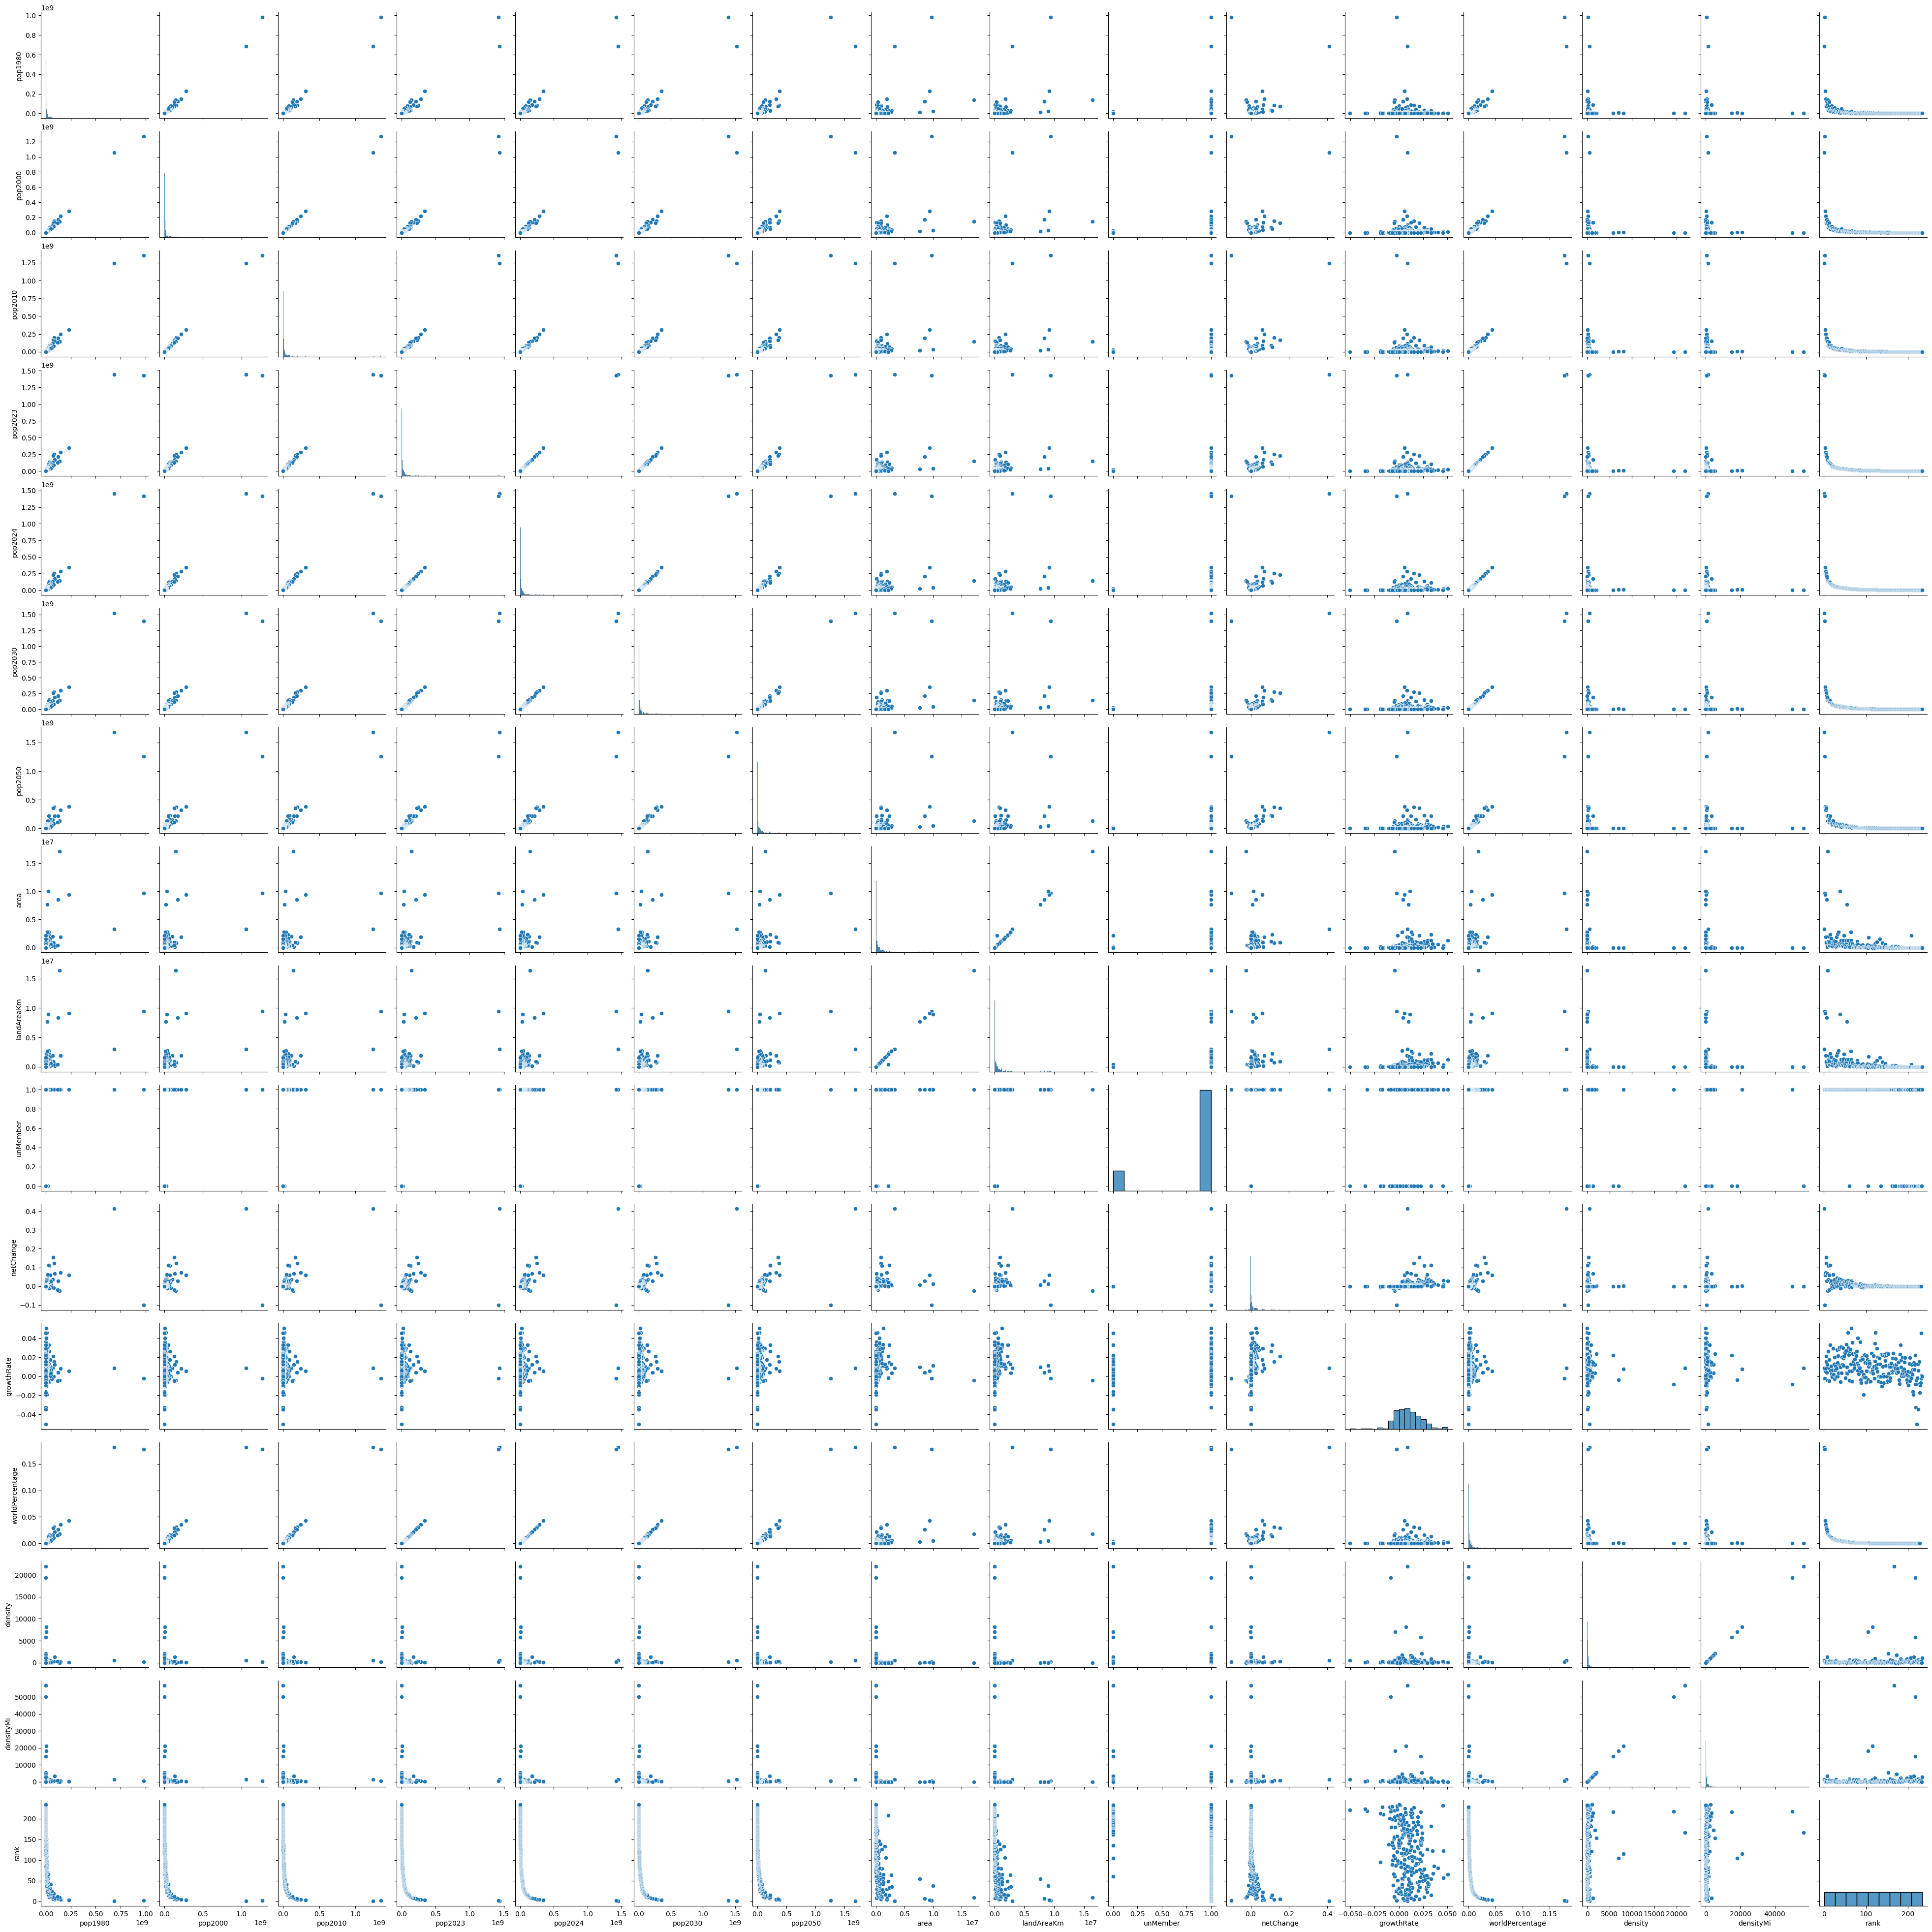

In [19]:
seab.pairplot(inp)
pyplot.show()

На основе анализа этого датасета можно сделать несколько выводов:
1. В этом наборе данных взаимосвязь между данными сильная, так как присутствует большее количество сильных корреляций, что можно увидеть на матрице корреляции;
2. Плотность данных невысокая;
3. Много колонок коррелирует между собой;
4. Колонки где отсутствует корреляция это: плотность населения на кв. км и на кв. милю, темп роста населения и низкая корреляция у изменения населения с 1980 по 2023 года, а также площадь места с водой и общая.